<blockquote>
    <h1>Exercise 10.9</h1>
    <p>Consider the <code>USArrests</code> data. We will now perform hierarchical clustering on the states.</p>
    <ol>
        <li>Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.</li>
        <li>Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?</li>
        <li>Hierarchically cluster the states using complete linkage and Euclidean distance, <i>after scaling the variables to have standard deviation one</i>.</li>
        <li>What effect does scaling the variables have on the hierarchical clustering obtained? In your opinion, should the variables be scaled before the inter-observation dissimilarities are computed? Provide a justification for your answer.</li>
    </ol>
</blockquote>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("../../DataSets/USArrests/USArrests.csv", index_col = 0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


<h3>Exercise 10.9.1</h3>
<blockquote>
    <i>Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.</i>
</blockquote>

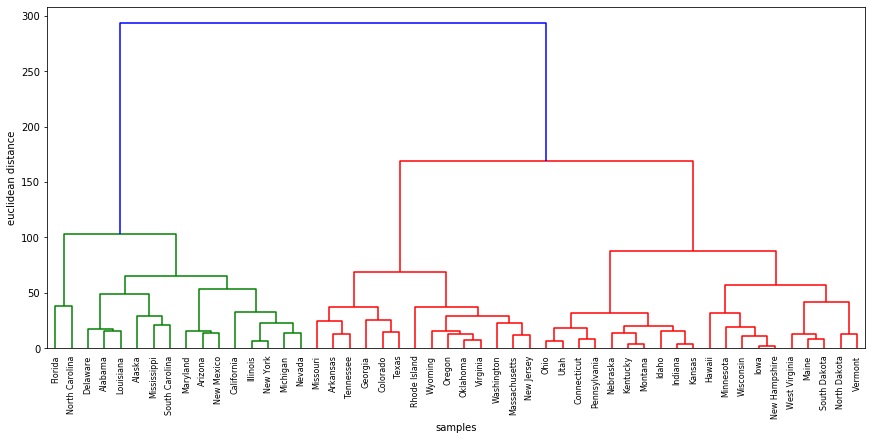

In [3]:
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(12, 6)) 
_ = ax.set_xlabel('samples')
_ = ax.set_ylabel('euclidean distance')
linked = linkage(df, method='complete', metric='euclidean') # Perform hierarchical/agglomerative clustering.
dend = dendrogram(linked, labels=df.index, ax=ax)

<h3>Exercise 10.9.2</h3>
<blockquote>
    <i>Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?</i>
</blockquote>

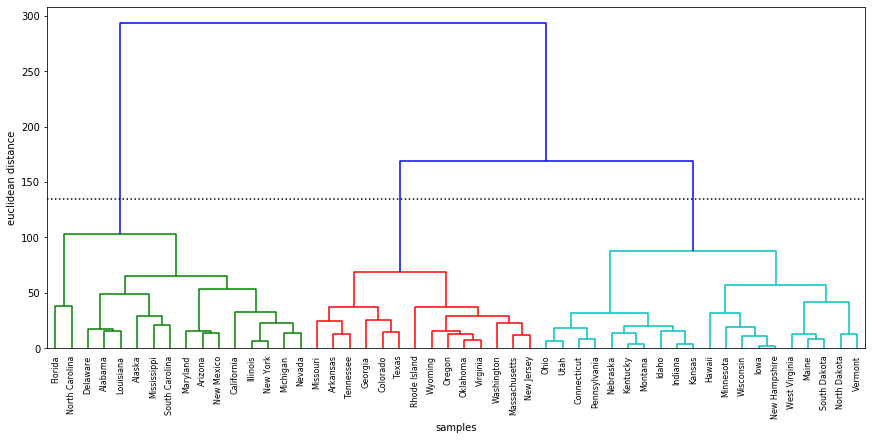

In [4]:
max_distance = 135  # max_d as in max_distance
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(12, 6)) 
_ = ax.set_xlabel('samples')
_ = ax.set_ylabel('euclidean distance')
linked = linkage(df, method='complete', metric='euclidean') # Perform hierarchical/agglomerative clustering.
dend = dendrogram(linked, labels=df.index, ax=ax, color_threshold=max_distance)
_ = ax.axhline(y=max_distance, c='black', linestyle=':')

<h3>Exercise 10.9.3</h3>
<blockquote>
    <i>Hierarchically cluster the states using complete linkage and Euclidean distance, <i>after scaling the variables to have standard deviation one</i>.</i>
</blockquote>

In [5]:
scaler = StandardScaler()
df_standardized = pd.DataFrame(
    scaler.fit_transform(df),
    index=df.index,
    columns=df.columns
)

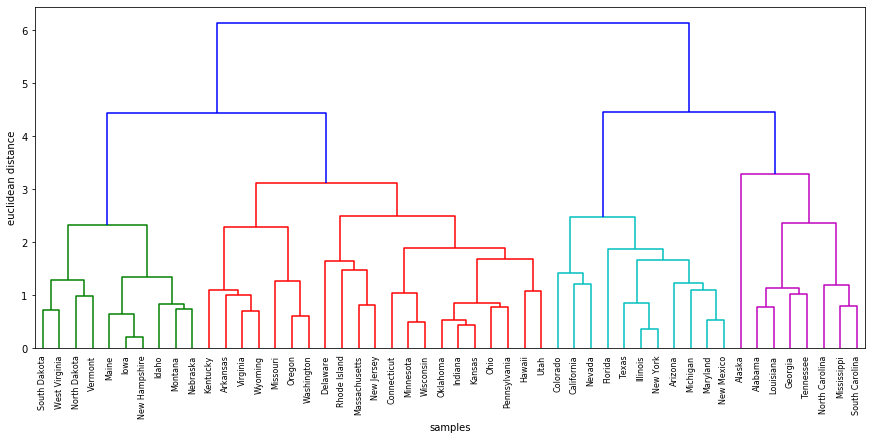

In [6]:
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(12, 6)) 
_ = ax.set_xlabel('samples')
_ = ax.set_ylabel('euclidean distance')
linked = linkage(df_standardized, method='complete', metric='euclidean') # Perform hierarchical/agglomerative clustering.
dend = dendrogram(linked, labels=df_standardized.index, ax=ax)

<h3>Exercise 10.9.4</h3>
<blockquote>
    <i>What effect does scaling the variables have on the hierarchical clustering obtained? In your opinion, should the variables be scaled before the inter-observation dissimilarities are computed? Provide a justification for your answer.</i>
</blockquote>

<p>With normalized data, the distance of the fusions near the top of the tree is smaller compared the distances near the leaves of the tree. I believe it is better to normalize the data because the different features of the data have very different variances, because, for instance, the $\mathrm{UrbanPop}$ variable is percentual, whereas $\mathrm{Rape}$ expresses the number of rapes in each state per 100,000 individuals.</p>